# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

C:\Users\Admin\anaconda3\envs\gan\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Admin\anaconda3\envs\gan\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [2]:
## Data loading
data_name = 'stock'
seq_len = 1000

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

Original data (first 5 rows):
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]]
Processed data (first 5 rows):
[[[0.00275482 0.        ]
  [0.00275482 0.        ]
  [0.00275482 0.        ]
  ...
  [0.4600551  0.92527473]
  [0.4600551  0.92527473]
  [0.45730028 0.92527473]]

 [[0.00275482 0.        ]
  [0.00275482 0.        ]
  [0.00275482 0.        ]
  ...
  [0.43801653 0.92087912]
  [0.44077135 0.92087912]
  [0.44352617 0.92307692]]

 [[0.00275482 0.        ]
  [0.00550964 0.0021978 ]
  [0.00275482 0.0021978 ]
  ...
  [0.48484848 0.92087912]
  [0.48484848 0.92087912]
  [0.48484848 0.92087912]]

 [[0.00275482 0.        ]
  [0.00550964 0.0021978 ]
  [0.00550964 0.0021978 ]
  ...
  [0.51790634 0.90549451]
  [0.51790634 0.90769231]
  [0.51790634 0.90769231]]

 [[0.00275482 0.        ]
  [0.00275482 0.        ]
  [0.         0.0021978 ]
  ...
  [0.54269972 0.9032967 ]
  [0.54269972 0.90549451]
  [0.54269972 0.90549451]]]
stock dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [3]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 2
parameters['iterations'] = 8000
parameters['batch_size'] = 32

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


step: 850/3500, e_loss: 0.0088
step: 860/3500, e_loss: 0.0079
step: 870/3500, e_loss: 0.007
step: 880/3500, e_loss: 0.0068
step: 890/3500, e_loss: 0.0085
step: 900/3500, e_loss: 0.0063
step: 910/3500, e_loss: 0.0083
step: 920/3500, e_loss: 0.0076
step: 930/3500, e_loss: 0.0065
step: 940/3500, e_loss: 0.0061
step: 950/3500, e_loss: 0.0065
step: 960/3500, e_loss: 0.0073
step: 970/3500, e_loss: 0.0073
step: 980/3500, e_loss: 0.008
step: 990/3500, e_loss: 0.0072
step: 1000/3500, e_loss: 0.0056
step: 1010/3500, e_loss: 0.0088
step: 1020/3500, e_loss: 0.0076
step: 1030/3500, e_loss: 0.0058
step: 1040/3500, e_loss: 0.007
step: 1050/3500, e_loss: 0.0063
step: 1060/3500, e_loss: 0.0066
step: 1070/3500, e_loss: 0.0067
step: 1080/3500, e_loss: 0.0068
step: 1090/3500, e_loss: 0.0067
step: 1100/3500, e_loss: 0.0059
step: 1110/3500, e_loss: 0.0053
step: 1120/3500, e_loss: 0.0064
step: 1130/3500, e_loss: 0.0052
step: 1140/3500, e_loss: 0.0075
step: 1150/3500, e_loss: 0.0066
step: 1160/3500, e_loss: 0

step: 3430/3500, e_loss: 0.0043
step: 3440/3500, e_loss: 0.0039
step: 3450/3500, e_loss: 0.0037
step: 3460/3500, e_loss: 0.0037
step: 3470/3500, e_loss: 0.0032
step: 3480/3500, e_loss: 0.0041
step: 3490/3500, e_loss: 0.0039
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/7000, s_loss: 0.1946
step: 10/7000, s_loss: 0.1497
step: 20/7000, s_loss: 0.1205
step: 30/7000, s_loss: 0.0987
step: 40/7000, s_loss: 0.0835
step: 50/7000, s_loss: 0.077
step: 60/7000, s_loss: 0.0706
step: 70/7000, s_loss: 0.0675
step: 80/7000, s_loss: 0.0617
step: 90/7000, s_loss: 0.0584
step: 100/7000, s_loss: 0.0557
step: 110/7000, s_loss: 0.051
step: 120/7000, s_loss: 0.0483
step: 130/7000, s_loss: 0.047
step: 140/7000, s_loss: 0.0427
step: 150/7000, s_loss: 0.0417
step: 160/7000, s_loss: 0.0387
step: 170/7000, s_loss: 0.0389
step: 180/7000, s_loss: 0.0387
step: 190/7000, s_loss: 0.0362
step: 200/7000, s_loss: 0.0371
step: 210/7000, s_loss: 0.0337
step: 220/7000, s_loss: 0.0365
st

step: 2510/7000, s_loss: 0.0033
step: 2520/7000, s_loss: 0.0031
step: 2530/7000, s_loss: 0.0033
step: 2540/7000, s_loss: 0.0032
step: 2550/7000, s_loss: 0.0031
step: 2560/7000, s_loss: 0.0031
step: 2570/7000, s_loss: 0.0033
step: 2580/7000, s_loss: 0.0033
step: 2590/7000, s_loss: 0.0033
step: 2600/7000, s_loss: 0.0033
step: 2610/7000, s_loss: 0.0033
step: 2620/7000, s_loss: 0.0031
step: 2630/7000, s_loss: 0.0031
step: 2640/7000, s_loss: 0.0032
step: 2650/7000, s_loss: 0.0035
step: 2660/7000, s_loss: 0.0034
step: 2670/7000, s_loss: 0.0034
step: 2680/7000, s_loss: 0.0032
step: 2690/7000, s_loss: 0.0031
step: 2700/7000, s_loss: 0.0033
step: 2710/7000, s_loss: 0.0031
step: 2720/7000, s_loss: 0.003
step: 2730/7000, s_loss: 0.0033
step: 2740/7000, s_loss: 0.0031
step: 2750/7000, s_loss: 0.0032
step: 2760/7000, s_loss: 0.0032
step: 2770/7000, s_loss: 0.0032
step: 2780/7000, s_loss: 0.0031
step: 2790/7000, s_loss: 0.0031
step: 2800/7000, s_loss: 0.0029
step: 2810/7000, s_loss: 0.003
step: 2820

step: 5080/7000, s_loss: 0.0017
step: 5090/7000, s_loss: 0.0018
step: 5100/7000, s_loss: 0.0021
step: 5110/7000, s_loss: 0.0021
step: 5120/7000, s_loss: 0.0018
step: 5130/7000, s_loss: 0.0021
step: 5140/7000, s_loss: 0.0018
step: 5150/7000, s_loss: 0.0019
step: 5160/7000, s_loss: 0.0018
step: 5170/7000, s_loss: 0.0018
step: 5180/7000, s_loss: 0.0018
step: 5190/7000, s_loss: 0.0018
step: 5200/7000, s_loss: 0.0018
step: 5210/7000, s_loss: 0.0018
step: 5220/7000, s_loss: 0.0017
step: 5230/7000, s_loss: 0.0018
step: 5240/7000, s_loss: 0.002
step: 5250/7000, s_loss: 0.0018
step: 5260/7000, s_loss: 0.0018
step: 5270/7000, s_loss: 0.0019
step: 5280/7000, s_loss: 0.0018
step: 5290/7000, s_loss: 0.0017
step: 5300/7000, s_loss: 0.0019
step: 5310/7000, s_loss: 0.0021
step: 5320/7000, s_loss: 0.0018
step: 5330/7000, s_loss: 0.0017
step: 5340/7000, s_loss: 0.0018
step: 5350/7000, s_loss: 0.0018
step: 5360/7000, s_loss: 0.0017
step: 5370/7000, s_loss: 0.0019
step: 5380/7000, s_loss: 0.002
step: 5390

step: 200/5000, d_loss: 2.7056, g_loss_u: 0.2706, g_loss_s: 0.0106, g_loss_v: 0.0196, e_loss_t0: 0.0033
step: 210/5000, d_loss: 1.5809, g_loss_u: 0.9855, g_loss_s: 0.0092, g_loss_v: 0.0208, e_loss_t0: 0.0038
step: 220/5000, d_loss: 1.5906, g_loss_u: 0.836, g_loss_s: 0.0086, g_loss_v: 0.02, e_loss_t0: 0.004
step: 230/5000, d_loss: 1.5826, g_loss_u: 0.9059, g_loss_s: 0.0093, g_loss_v: 0.0226, e_loss_t0: 0.0039
step: 240/5000, d_loss: 1.5859, g_loss_u: 0.8674, g_loss_s: 0.0095, g_loss_v: 0.0162, e_loss_t0: 0.0034
step: 250/5000, d_loss: 1.5995, g_loss_u: 0.8515, g_loss_s: 0.0087, g_loss_v: 0.0198, e_loss_t0: 0.0042
step: 260/5000, d_loss: 1.7123, g_loss_u: 0.8282, g_loss_s: 0.009, g_loss_v: 0.018, e_loss_t0: 0.0034
step: 270/5000, d_loss: 1.9226, g_loss_u: 0.9084, g_loss_s: 0.0098, g_loss_v: 0.0178, e_loss_t0: 0.0035
step: 280/5000, d_loss: 2.0356, g_loss_u: 0.9859, g_loss_s: 0.0096, g_loss_v: 0.019, e_loss_t0: 0.004
step: 290/5000, d_loss: 1.8808, g_loss_u: 0.9784, g_loss_s: 0.0099, g_lo

step: 1000/5000, d_loss: 1.8128, g_loss_u: 1.2628, g_loss_s: 0.0073, g_loss_v: 0.018, e_loss_t0: 0.0035
step: 1010/5000, d_loss: 2.0214, g_loss_u: 1.6201, g_loss_s: 0.0066, g_loss_v: 0.0176, e_loss_t0: 0.0036
step: 1020/5000, d_loss: 1.8371, g_loss_u: 1.0643, g_loss_s: 0.0061, g_loss_v: 0.0194, e_loss_t0: 0.0027
step: 1030/5000, d_loss: 1.9004, g_loss_u: 1.2849, g_loss_s: 0.0061, g_loss_v: 0.012, e_loss_t0: 0.0028
step: 1040/5000, d_loss: 1.9042, g_loss_u: 1.2291, g_loss_s: 0.0064, g_loss_v: 0.0248, e_loss_t0: 0.0037
step: 1050/5000, d_loss: 1.8858, g_loss_u: 1.0506, g_loss_s: 0.006, g_loss_v: 0.0203, e_loss_t0: 0.003
step: 1060/5000, d_loss: 1.8679, g_loss_u: 1.023, g_loss_s: 0.0061, g_loss_v: 0.0199, e_loss_t0: 0.0038
step: 1070/5000, d_loss: 1.8219, g_loss_u: 1.087, g_loss_s: 0.0058, g_loss_v: 0.0148, e_loss_t0: 0.0035
step: 1080/5000, d_loss: 1.7656, g_loss_u: 1.0841, g_loss_s: 0.0061, g_loss_v: 0.0191, e_loss_t0: 0.0038
step: 1090/5000, d_loss: 1.6516, g_loss_u: 1.0201, g_loss_s: 

step: 1790/5000, d_loss: 1.7937, g_loss_u: 1.0271, g_loss_s: 0.0065, g_loss_v: 0.0135, e_loss_t0: 0.0029
step: 1800/5000, d_loss: 1.787, g_loss_u: 1.0121, g_loss_s: 0.0056, g_loss_v: 0.0135, e_loss_t0: 0.0031
step: 1810/5000, d_loss: 1.7745, g_loss_u: 1.0107, g_loss_s: 0.0057, g_loss_v: 0.0198, e_loss_t0: 0.0035
step: 1820/5000, d_loss: 1.7695, g_loss_u: 0.9979, g_loss_s: 0.0054, g_loss_v: 0.0164, e_loss_t0: 0.0026
step: 1830/5000, d_loss: 1.7587, g_loss_u: 0.9939, g_loss_s: 0.0051, g_loss_v: 0.0132, e_loss_t0: 0.0029
step: 1840/5000, d_loss: 1.7385, g_loss_u: 0.989, g_loss_s: 0.0056, g_loss_v: 0.0225, e_loss_t0: 0.0036
step: 1850/5000, d_loss: 1.7227, g_loss_u: 0.9916, g_loss_s: 0.0075, g_loss_v: 0.033, e_loss_t0: 0.0029
step: 1860/5000, d_loss: 1.7022, g_loss_u: 0.9771, g_loss_s: 0.0064, g_loss_v: 0.0191, e_loss_t0: 0.0024
step: 1870/5000, d_loss: 1.6825, g_loss_u: 0.9698, g_loss_s: 0.0052, g_loss_v: 0.0207, e_loss_t0: 0.0023
step: 1880/5000, d_loss: 1.6548, g_loss_u: 0.958, g_loss_s

step: 2580/5000, d_loss: 1.8342, g_loss_u: 1.0609, g_loss_s: 0.0073, g_loss_v: 0.0258, e_loss_t0: 0.0045
step: 2590/5000, d_loss: 1.8283, g_loss_u: 1.0657, g_loss_s: 0.007, g_loss_v: 0.0248, e_loss_t0: 0.005
step: 2600/5000, d_loss: 1.8473, g_loss_u: 1.0567, g_loss_s: 0.007, g_loss_v: 0.0206, e_loss_t0: 0.0052
step: 2610/5000, d_loss: 1.8341, g_loss_u: 1.066, g_loss_s: 0.0059, g_loss_v: 0.0166, e_loss_t0: 0.0048
step: 2620/5000, d_loss: 1.8307, g_loss_u: 1.0532, g_loss_s: 0.0058, g_loss_v: 0.0168, e_loss_t0: 0.0059
step: 2630/5000, d_loss: 1.8335, g_loss_u: 1.0467, g_loss_s: 0.0057, g_loss_v: 0.018, e_loss_t0: 0.0056
step: 2640/5000, d_loss: 1.8356, g_loss_u: 1.0538, g_loss_s: 0.0053, g_loss_v: 0.0121, e_loss_t0: 0.0053
step: 2650/5000, d_loss: 1.8307, g_loss_u: 1.0683, g_loss_s: 0.0078, g_loss_v: 0.0302, e_loss_t0: 0.0049
step: 2660/5000, d_loss: 1.8295, g_loss_u: 1.0467, g_loss_s: 0.0069, g_loss_v: 0.0193, e_loss_t0: 0.0055
step: 2670/5000, d_loss: 1.8133, g_loss_u: 1.0793, g_loss_s:

step: 3370/5000, d_loss: 1.8673, g_loss_u: 1.0774, g_loss_s: 0.0051, g_loss_v: 0.0145, e_loss_t0: 0.0021
step: 3380/5000, d_loss: 1.8488, g_loss_u: 1.0697, g_loss_s: 0.0049, g_loss_v: 0.0131, e_loss_t0: 0.002
step: 3390/5000, d_loss: 1.8545, g_loss_u: 1.0149, g_loss_s: 0.005, g_loss_v: 0.0174, e_loss_t0: 0.0021
step: 3400/5000, d_loss: 1.8317, g_loss_u: 1.0329, g_loss_s: 0.005, g_loss_v: 0.0162, e_loss_t0: 0.0023
step: 3410/5000, d_loss: 1.8273, g_loss_u: 1.0432, g_loss_s: 0.0051, g_loss_v: 0.0162, e_loss_t0: 0.0027
step: 3420/5000, d_loss: 1.816, g_loss_u: 1.0296, g_loss_s: 0.0057, g_loss_v: 0.0182, e_loss_t0: 0.0026
step: 3430/5000, d_loss: 1.8247, g_loss_u: 1.0517, g_loss_s: 0.0052, g_loss_v: 0.0145, e_loss_t0: 0.0024
step: 3440/5000, d_loss: 1.8177, g_loss_u: 1.009, g_loss_s: 0.0058, g_loss_v: 0.0285, e_loss_t0: 0.0025
step: 3450/5000, d_loss: 1.7664, g_loss_u: 1.0759, g_loss_s: 0.02, g_loss_v: 0.0294, e_loss_t0: 0.0024
step: 3460/5000, d_loss: 1.777, g_loss_u: 0.883, g_loss_s: 0.0

step: 4160/5000, d_loss: 1.5233, g_loss_u: 1.8859, g_loss_s: 0.0069, g_loss_v: 0.0206, e_loss_t0: 0.0044
step: 4170/5000, d_loss: 1.4432, g_loss_u: 2.1301, g_loss_s: 0.0065, g_loss_v: 0.0168, e_loss_t0: 0.0042
step: 4180/5000, d_loss: 1.1528, g_loss_u: 2.4209, g_loss_s: 0.0068, g_loss_v: 0.0179, e_loss_t0: 0.004
step: 4190/5000, d_loss: 1.4794, g_loss_u: 3.3235, g_loss_s: 0.0126, g_loss_v: 0.022, e_loss_t0: 0.004
step: 4200/5000, d_loss: 1.6334, g_loss_u: 2.8236, g_loss_s: 0.0156, g_loss_v: 0.0238, e_loss_t0: 0.0046
step: 4210/5000, d_loss: 1.5852, g_loss_u: 2.6699, g_loss_s: 0.0121, g_loss_v: 0.0251, e_loss_t0: 0.0043
step: 4220/5000, d_loss: 1.4603, g_loss_u: 2.9072, g_loss_s: 0.0096, g_loss_v: 0.0252, e_loss_t0: 0.0043
step: 4230/5000, d_loss: 1.3563, g_loss_u: 2.7876, g_loss_s: 0.01, g_loss_v: 0.0259, e_loss_t0: 0.0048
step: 4240/5000, d_loss: 1.1758, g_loss_u: 2.9946, g_loss_s: 0.0101, g_loss_v: 0.0313, e_loss_t0: 0.0039
step: 4250/5000, d_loss: 0.9909, g_loss_u: 3.0812, g_loss_s:

step: 4950/5000, d_loss: 1.8273, g_loss_u: 1.115, g_loss_s: 0.0054, g_loss_v: 0.0154, e_loss_t0: 0.0024
step: 4960/5000, d_loss: 1.823, g_loss_u: 1.1069, g_loss_s: 0.0056, g_loss_v: 0.0153, e_loss_t0: 0.0024
step: 4970/5000, d_loss: 1.8292, g_loss_u: 1.1075, g_loss_s: 0.006, g_loss_v: 0.0126, e_loss_t0: 0.0023
step: 4980/5000, d_loss: 1.8248, g_loss_u: 1.1086, g_loss_s: 0.0062, g_loss_v: 0.0162, e_loss_t0: 0.0017
step: 4990/5000, d_loss: 1.8306, g_loss_u: 1.1133, g_loss_s: 0.0052, g_loss_v: 0.0137, e_loss_t0: 0.0019
Finish Joint Training
Finish Synthetic Data Generation
Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.2545

Predictive score: 0.0831


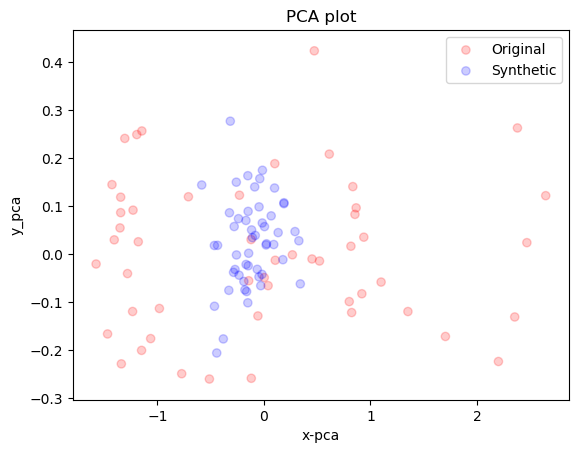

[t-SNE] Computing 101 nearest neighbors...
[t-SNE] Indexed 102 samples in 0.000s...
[t-SNE] Computed neighbors for 102 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 102 / 102
[t-SNE] Mean sigma: 0.890303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.481216
[t-SNE] KL divergence after 300 iterations: 1.305777


C:\Users\Admin\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Admin\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Admin\anaconda3\envs\gan\lib\site-pac

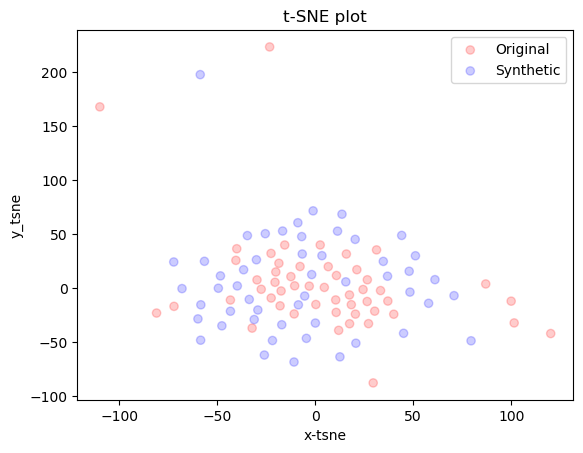

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from utils import extract_time, rnn_cell, random_generator, batch_generator

# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

# 反向归一化处理
scaler = MinMaxScaler()
scaler.fit(ori_data.reshape(-1, ori_data.shape[-1]))  # 使用原始数据进行fit
generated_data = scaler.inverse_transform(generated_data.reshape(-1, generated_data.shape[-1])).reshape(generated_data.shape)

# 将生成的数据四舍五入为整数
#generated_data = np.round(generated_data).astype(int)

dim = 2
# Save generated data
generated_data_array = np.array(generated_data)
np.save('generated_data.npy', generated_data_array)  # Save as .npy file
pd.DataFrame(generated_data_array.reshape(-1, dim)).to_csv('generated_data.csv', index=False)  # Save as .csv file

metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
    temp_disc = discriminative_score_metrics(ori_data, generated_data)
    discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

predictive_score = list()
for tt in range(metric_iteration):
    temp_pred = predictive_score_metrics(ori_data, generated_data)
    predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')


## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [18]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Discriminative score: 0.2448


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [ ]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

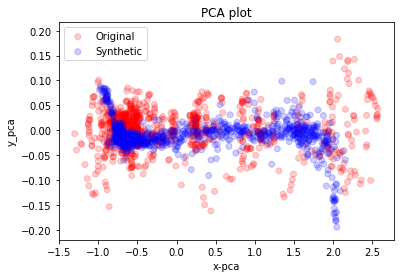

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.031771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.970322
[t-SNE] KL divergence after 300 iterations: 0.729995


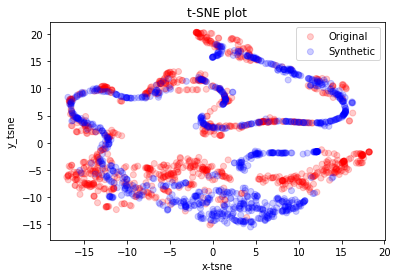

In [7]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')